<a href="https://colab.research.google.com/github/nikshargithub/ML_PROJECTS/blob/main/2024_01_18_NIKHIL_SHARMA_PROJECT_81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Instructions

#### Goal of the Project

This project is designed for you to practice and solve the activities that are based on the concepts covered in the following lessons:

 1. Logistic Regression - Univariate Classification I

 2. Logistic Regression - Decision Boundary

 3. Logistic Regression - Multiclass Classification I

 4. Logistic Regression - Multiclass Classification II




----

#### Getting Started:

1. Click on this link to open the Colab file for this project.

     Link on Panel  

2. Create a duplicate copy of the Colab file as described below.

  - Click on the **File menu**. A new drop-down list will appear.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/lesson-0/0_file_menu.png' width=500>

  - Click on the **Save a copy in Drive** option. A duplicate copy will get created. It will open up in the new tab on your web browser.

  <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/lesson-0/1_create_colab_duplicate_copy.png' width=500>

3. After creating the duplicate copy of the notebook, please rename it in the **YYYY-MM-DD_StudentName_Project80** format.

4. Now, write your code in the prescribed code cells.


---

### Problem Statement

In this project, you are going to create your synthetic data for multiclass classification, synthesize the data for training, and create a Random Forest Classification model and a Logistic Regression model to classify the data using Machine Learning. Conclude the project by comparing the models and their results.


---

### List of Activities

**Activity 1:** Create the Dummy Dataset

**Activity 2:**  Dataset Inspection

**Activity 3:**  Train-Test Split

**Activity 4:** Apply SMOTE

**Activity 5:** Random Forest Classification - Model Training

**Activity 6:** Random Forest Classification - Model Prediction and Evaluation (Testing Set)

**Activity 7:** Logistic Regression - Model Training

**Activity 8:** Logistic Regression - Model Prediction and Evaluation (Testing Set)


---

#### Activity 1: Create the Dummy Dataset

In this activity, you have to create a dummy dataset for multiclass classification.

The steps to be followed are as follows:

**1.** Create a dummy dataset having two columns representing two independent variables and a third column representing the target.  

  The number of records should be divided into 6 random groups like `[500, 2270, 1900, 41, 2121, 272]` such that the target columns has 6 different labels `[0, 1, 2, 3, 4, 5]`.


  **Recall:**

  To create a dummy data-frame, use the `make_blob()` function of the `sklearn.datasets` module which will return two arrays `feature_array` and the `target_array`. The syntax for the `make_blob()` function is as follows:

  **Syntax:** `make_blobs(n_samples, centers, n_features, random_state, cluster_std)`



In [ ]:
# Instruction to remove warning messages
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Create two arrays using the 'make_blobs()' function and store them in the 'features_array' and 'target_array' variables.
from sklearn.datasets import make_blobs
features_array,target_array = make_blobs(n_samples = [500, 2270, 1900, 41, 2121, 272],centers = None,n_features = 2,cluster_std=0.01)

**Hint:**

In the `make_blobs()` function use `n_samples=[500, 2270, 1900, 41, 2121, 272]` and `center=None` for the division of target label into seven groups.

----
**2.** Print the object-type of the arrays created by the `make_blob()` function and also print the number of rows and columns in them:

In [ ]:
# Find out the object-type of the arrays created by the 'make_blob()' function and the number of rows and columns in them.

# Print the type of 'features_array' and 'target_array'
print(type(features_array))
print(type(target_array))
# Print the number of rows and column of 'features_array'
print(features_array.shape)
# Print the number of rows and column of 'target_array'
print(target_array.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(7104, 2)
(7104,)


**Q:** How many rows are created in the feature and target columns?

**A:** 7104

----
**3.** Create a DataFrame from the two arrays using a Python dictionary.

**Steps: (Learned in "Logistic Regression - Decision Boundary" lesson**)
- Create a dummy dictionary.

- Add the feature columns as keys `col 1`, `col 2`, and target column as the `target`.

- Add the values from the feature and target columns one by one respectively in the dictionary using List Comprehension.

- Convert the dictionary into a DataFrame

- Print the first five rows of the DataFrame.

In [ ]:
# Create a Pandas DataFrame containing the items from the 'features_array' and 'target_array' arrays.

# Import the module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Create a dummy dictionary
dummy_dict = {'col1':[i[0] for i in features_array],'col2':[i[1] for i in features_array],'target':target_array}

# Convert the dictionary into DataFrame
dummy_df = pd.DataFrame.from_dict(dummy_dict)
# Print first five rows of the DataFrame
dummy_df.head()

,col1,col2,target
0,-2.311001,-9.591561,4
1,-9.704676,2.468964,5
2,8.527520,-0.248858,1
3,-2.327199,-9.591747,4
4,8.510177,-0.240656,1


**Hint:**

Use function `from_dict()` to convert Python Dictionary to DataFrame.

**Syntax:** `pd.DataFrame.from_dict(some_dictionary)`

**After this activity, the DataFrame should be created with two independent features columns and one dependent target column.**

----

#### Activity 2: Dataset Inspection

In this activity, you have to look into the distribution of the labels in the `target` column of the DataFrame.

**1.** Print the number of occurrences of each label in the `target` column:

In [ ]:
# Display the number of occurrences of each label in the 'target' column.
dummy_df['target'].value_counts()

1    2270
4    2121
2    1900
0     500
5     272
3      41
Name: target, dtype: int64

**2.** Print the percentage of the samples for each label in the `target` column:

In [ ]:
# Get the percentage of count of each label samples in the dataset.
(dummy_df['target'].value_counts()/dummy_df.shape[0])*100

1    31.953829
4    29.856419
2    26.745495
0     7.038288
5     3.828829
3     0.577140
Name: target, dtype: float64

**Q:** How many unique labels are present in the DataFrame? What are they?

**A:** 6, [1,4,2,0,5,3]

**Q:** Is the DataFrame balanced?

**A:** No
---



**3.**  Create a scatter plot between the columns `col 1` and `col 2` for all the labels to visualize the clusters of every label (or points):

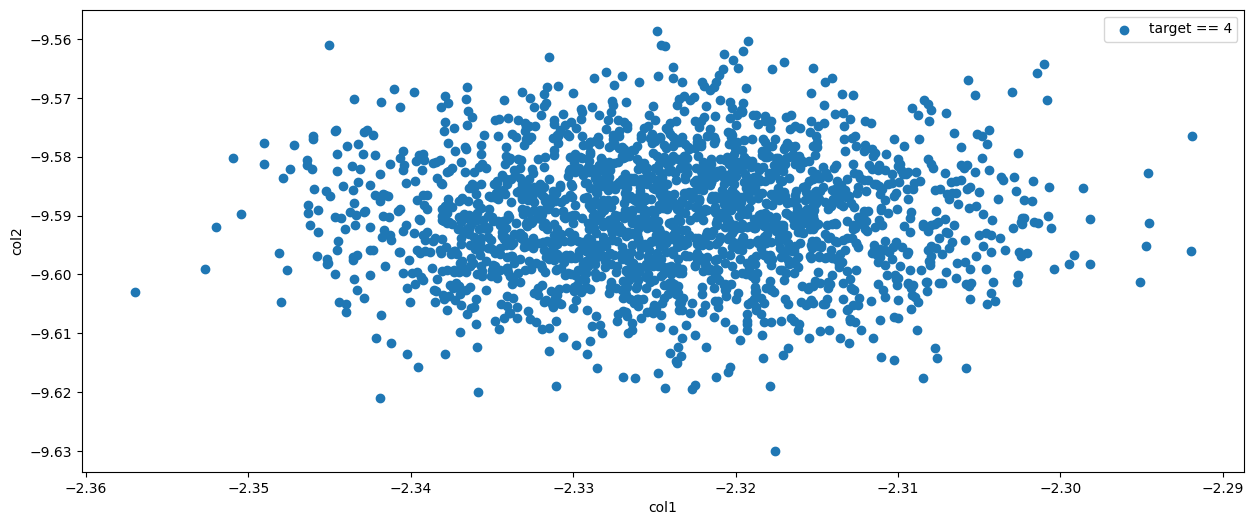

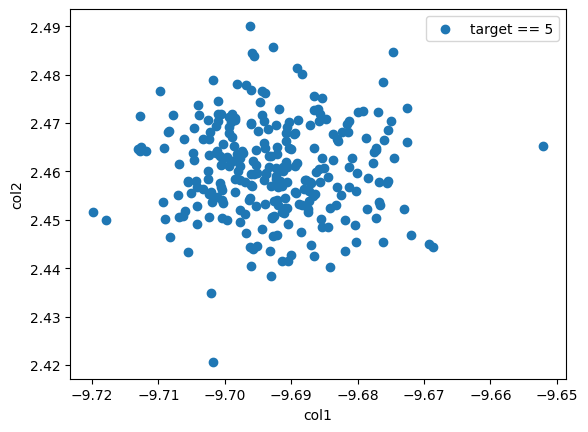

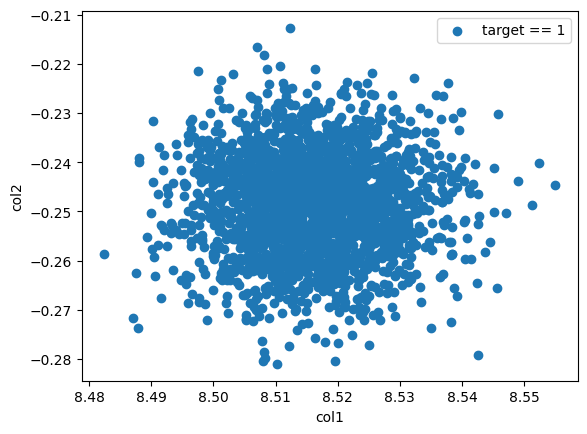

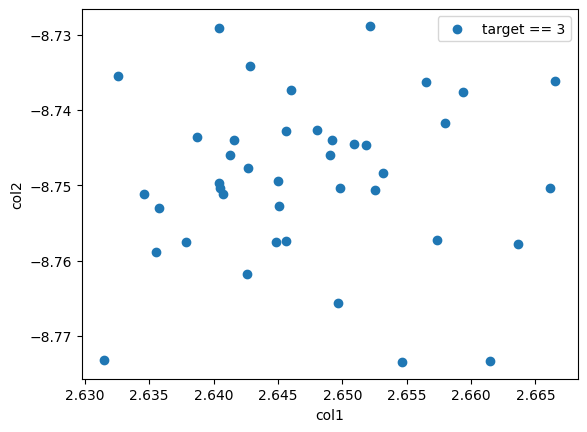

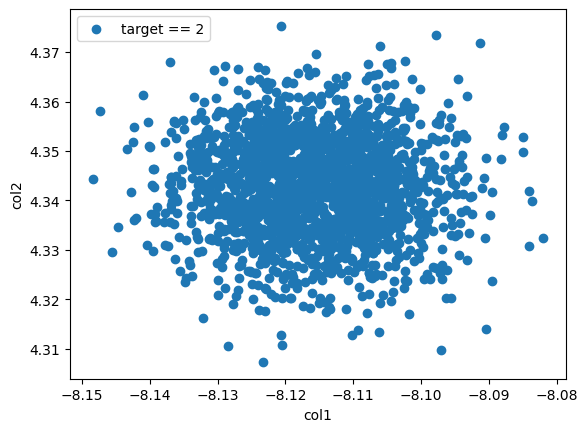

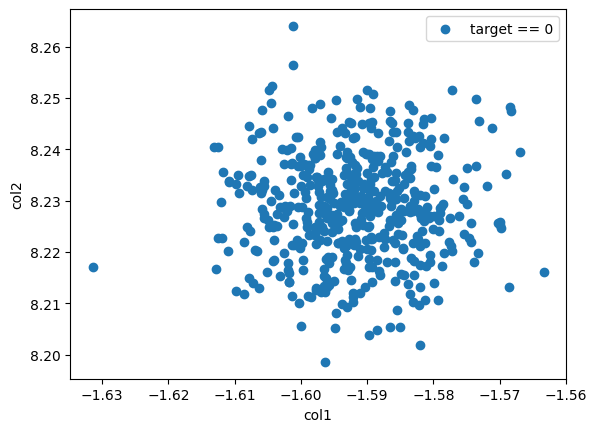

In [ ]:
# Create a scatter plot between 'col 1' and 'col 2' columns separately for all the labels in the same plot.

# Import the module


# Define the size of the graph
plt.figure(figsize = (15,6))
# Create a for loop executing for every unique label in the `target` column.

for i in dummy_df['target'].unique():
  # Plot the scatter plot for 'col 1' and 'col 2' where 'target ==i"
  plt.scatter(dummy_df['col1'].loc[dummy_df["target"]==i],
              dummy_df['col2'].loc[dummy_df['target']==i],
              label = f"target == {i}")
  plt.xlabel('col1')
  plt.ylabel('col2')
  plt.legend()
  plt.show()
# Plot the x and y lables

# Display the legends and the graph


**Hint:**
Revise the lesson "Logistic Regression - Decision Boundary".

**After this activity, the labels to be predicted that is the target variables and their distribution should be known.**

----

#### Activity 3: Train-Test Split

We need to predict the value of the `target` variable, using other variables. Thus, the `target` is the dependent variable and other columns are the independent variables.

**1.** Split the dataset into the training set and test set such that the training set contains 70% of the instances and the remaining instances will become the test set.

**2.** Set `random_state = 42`.

In [ ]:
# Import 'train_test_split' module

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

# Create the features data frame holding all the columns except the last column
# and print first five rows of this dataframe
features_df = dummy_df[dummy_df.columns[:-1]]
print(features_df.head())
# Create the target series that holds last column 'target'
# and print first five rows of this series
target_df = dummy_df['target']
print(target_df.head())
# Split the train and test sets using the 'train_test_split()' function.
x_train,x_test,y_train,y_test = train_test_split(features_df, target_df, test_size = 0.30, random_state=42)

       col1      col2
0 -2.311001 -9.591561
1 -9.704676  2.468964
2  8.527520 -0.248858
3 -2.327199 -9.591747
4  8.510177 -0.240656
0    4
1    5
2    1
3    4
4    1
Name: target, dtype: int64


**3.** Print the number of rows and columns in the training and testing set:

In [ ]:
# Print the shape of all the four variables i.e. 'X_train', 'X_test', 'y_train' and 'y_test'
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(4972, 2) (2132, 2) (4972,) (2132,)


**After this activity, the features and target data should be split into training and testing data.**

----

#### Activity 4: Apply SMOTE

In this activity, if the data is imbalanced, oversample the data for the minority classes in the following way:

1. Create an object for the SMOTE using `SMOTE()` function.
2. Synthesize the data for the minority class using `fit_sample()` function by passing the feature and target training variable.
3. Save the output of the above step, artificial data, in the new feature and target training variables.

In [ ]:
# Write the code to apply oversample the data.

# Import the 'SMOTE' module from the 'imblearn.over_sampling' library.


# Call the 'SMOTE()' function and store it in the a variable.
smote_obj = SMOTE(sampling_strategy = 'all', random_state=42)
# Call the 'fit_sample()' function.
x_train_resample,y_train_resample = smote_obj.fit_resample(x_train,y_train)

Print the number of rows and columns in the original and artificial feature and target data:

In [ ]:
# Print the number of rows and columns in the original and  resampled data.
print(x_train.shape)
print(y_train.shape)
print(x_train_resample.shape)
print(y_train_resample.shape)

(4972, 2)
(4972,)
(9504, 2)
(9504,)


**Q:** How many rows and columns are there in the original features data?

**A:** 4972 rows 2 columns

**Q:** How many rows and columns are there in the artificially generated features data?

**A:** 9432 rows and 2 columns

----
Print the number of occurrences of labels in the artificially generated target data:

In [ ]:
# Display the number of occurrences of each label in the artificially target data.
y_train_resample.value_counts()

4    1584
2    1584
1    1584
5    1584
0    1584
3    1584
Name: target, dtype: int64

**Q.** Are the number of occurrances equal for all the labels?

**A** Yes

**After this activity, the training feature and target data should have the synthetic data such that all the labels have equal occurrances and the data is balanced**

----

#### Activity 5: Random Forest Classification - Model Training

Implement Random Forest Classification using `sklearn` module in the following way:

1. Deploy the model by importing the `RandomForestClassifier` class and create an object of this class.
2. Call the `fit()` function using the Random Forest Classifier object and print score using the `score()` function using the object created.


In [ ]:
# Import the required modules from the 'sklearn.ensemble' and 'sklearn.metrics' libraries
from sklearn.metrics import confusion_matrix, classification_report
# Train the Random Forest Classifier
rf_clf = RandomForestClassifier(n_jobs=-1,n_estimators = 100)
rf_clf.fit(x_train_resample,y_train_resample)
rf_clf.score(x_train_resample,y_train_resample)

1.0

**Q:** What is the accuracy score?

**A:** 100%

**Q:** Is it 100%?

**A:** Yes

**After this activity, a Random Forest Classification model object should be trained for multiclass classification.**

---

#### Activity 6: Random Forest Classification - Model Prediction and Evaluation (Testing Set)

**1.** Predict the values for the testing set by calling the `predict()` function on the Random Forest Classifier object.

**2.** Print the unique labels predicted using Random Forest Regression on training features.

**3.** Print the distribution of the labels predicted in the predicted target series for the testing features.


In [ ]:
# Make predictions using Random Forest Classifier model object

# Make predictions on the test dataset by using the 'predict()' function.
y_test_pred_rf = pd.Series(rf_clf.predict(x_test))
# Check the count of records classified under each label

# Print the unique labels in the predicted series for testing features
print(y_test.unique())
# Print the distribution labels in the predicted series for testing features
print(y_test_pred_rf.value_counts())

[4 0 1 2 5 3]
1    686
4    657
2    554
0    154
5     68
3     13
dtype: int64


**Q:** Are all the label values predicted for the testing features data?

**A:** Yes

$$ $$
**Q:** Which labels are predicted and not predicted by the Random Forest Classification model?

**A:**all predicted

---
**4.** Display the confusion matrix for the testing set:


In [ ]:
# Print the confusion matrix for the actual and predicted data of the test set (if required)
conf_matrix_rf = confusion_matrix(y_test,y_test_pred_rf)
print(conf_matrix_rf)

[[154   0   0   0   0   0]
 [  0 686   0   0   0   0]
 [  0   0 554   0   0   0]
 [  0   0   0  13   0   0]
 [  0   0   0   0 657   0]
 [  0   0   0   0   0  68]]


**5.** Visualize the confusion matrix using the heatmap:

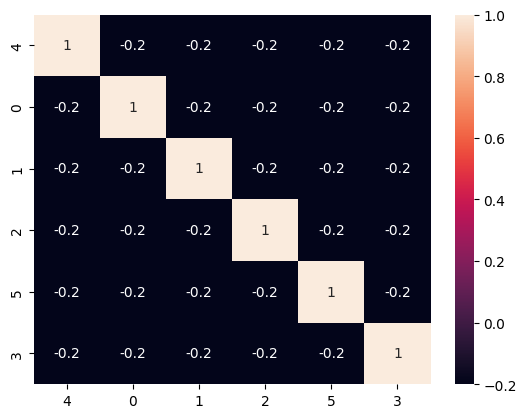

In [ ]:
# Create the heatmap for the confusion matrix

# import the module
import seaborn as sns

# Create a series of all unique labels in actual target data
labels = pd.Series(y_test.unique())
# Create a Pandas DataFrame object for the confusion matrix created above labelled with the classes.
conf_df = pd.DataFrame(conf_matrix_rf,columns=labels)
# Create a heatmap for the confusion matrix.
corr_df = conf_df.corr()
sns.heatmap(corr_df,annot=True)
plt.show()

**Note:** Use `fmt='d'` as one of the parameters in the `heatmap()` to display the values in plain notation.

**Q.** Explain the heat map output in short based on the number of positive and negative outcomes for each class?

**A** All negative and constant

---
**6.** Display the classification report for the test set:

In [ ]:
# Print the classification report for the actual and predicted data of the testing set (if required)
print(classification_report(y_test,y_test_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       154
           1       1.00      1.00      1.00       686
           2       1.00      1.00      1.00       554
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00       657
           5       1.00      1.00      1.00        68

    accuracy                           1.00      2132
   macro avg       1.00      1.00      1.00      2132
weighted avg       1.00      1.00      1.00      2132



**Q** Which classes were identified correctly without any misclassification?

**A** all

**Q** Which class has the lowest f1-score?

**A** None

**After this activity, labels should be predicted for the target columns using the test features set and the Random Forest Classifier model should be evaluated for the same.**

---

#### Activity 7: Logistic Regression - Model Training

Implement Logistic Regression Classification using `sklearn` module in the following way:

1. Deploy the model by importing the `LogisticRegression` class and create an object of this class.
2. Call the `fit()` function on the Logistic Regression object and print the score using the `score()` function.


In [ ]:
# Build a logistic regression model using the 'sklearn' module.
from sklearn.linear_model import LogisticRegression

# 1. First, call the 'LogisticRegression' module and store it in 'lg_clg' variable.
lg_clg = LogisticRegression()
# 2. Call the 'fit()' function with 'X_train' and 'y_train' as inputs.
lg_clg.fit(x_train,y_train)
# 3. Call the 'score()' function with 'X_train' and 'y_train' as inputs to check the accuracy score of the model.
lg_clg.score(x_train,y_train)

1.0

**Q:** What is the accuracy score?

**A:** 100

**Q:** Is it 100%?

**A:**yes

**After this activity, a Logistic Regression model object should be trained for multiclass classification.**

----

#### Activity 8: Logistic Regression - Model Prediction and Evaluation (Testing Set)

**1.** Predict the values for the test set by calling the `predict()` function on the Logistic Regression object.

**2.** Print the unique labels predicted using Logistic Regression on test features.

**3.** Print the distribution of the labels predicted in the predicted target series for the test features.


In [ ]:
# Predict the values of 'target' by the logistic regression model on the test set.

# Predict the target for the test features data
y_test_pred_lg = pd.Series(lg_clg.predict(x_test))
# Convert the predicted array into series

# Print the unique labels in the predicted series for test features
print(y_test.unique())
print(y_test_pred_lg.value_counts())
# Print the distribution labels in the predicted series for test features


[4 0 1 2 5 3]
1    686
4    657
2    554
0    154
5     68
3     13
dtype: int64


**Q:** Are all the labels predicted for the test features data?

**A:**yes

$$ $$
**Q:** What are labels predicted and not predicted using Logistic Regression model object?

**A:**all predicted

---
**4.** Display the confusion matrix for the test set:


In [ ]:
# Print the confusion matrix for the actual and predicted data of the test set (if required)
conf_matrix_lg = confusion_matrix(y_test,y_test_pred_lg)
print(conf_matrix_lg)

[[154   0   0   0   0   0]
 [  0 686   0   0   0   0]
 [  0   0 554   0   0   0]
 [  0   0   0  13   0   0]
 [  0   0   0   0 657   0]
 [  0   0   0   0   0  68]]


**5.** Visualize the confusion matrix using the heatmap:

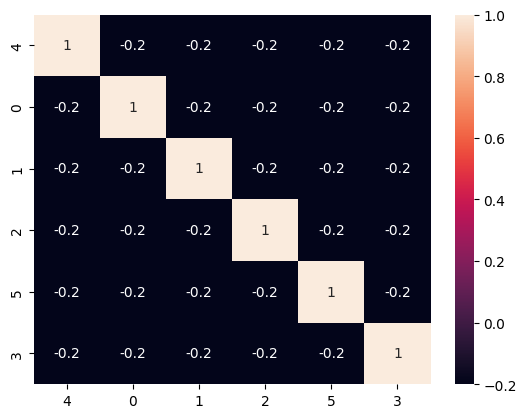

In [ ]:
# Create the heatmap for the confusion matrix generated by Logistic Regression testing predictions

# Create a Pandas DataFrame object for the confusion matrix created above labelled with the classes.
conf_df_lg = pd.DataFrame(conf_matrix_lg,columns=labels)
# Create a heatmap for the confusion matrix.
corr_df_lg = conf_df_lg.corr()
sns.heatmap(corr_df_lg,annot=True)
plt.show()


**6.** Display the classification report for the test set:

In [ ]:
# Print the classification report for the actual and predicted data of the testing set (if required)
print(classification_report(y_test,y_test_pred_lg))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       154
           1       1.00      1.00      1.00       686
           2       1.00      1.00      1.00       554
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00       657
           5       1.00      1.00      1.00        68

    accuracy                           1.00      2132
   macro avg       1.00      1.00      1.00      2132
weighted avg       1.00      1.00      1.00      2132



**Q** Which classes were identified correctly without any misclassification?

**A** all

**Q** Which class has the lowest f1-score?

**A**None

**After this activity, labels should be predicted for the target columns using the test features set and the Logistic Regression model should be evaluated for the same.**

---

**Write your interpretation of the results here.**

- Interpretation 1:


- Interpretation 2:

---

### Submitting the Project:

1. After finishing the project, click on the **Share** button on the top right corner of the notebook. A new dialog box will appear.

  <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/2_share_button.png' width=500>

2. In the dialog box, make sure that '**Anyone on the Internet with this link can view**' option is selected and then click on the **Copy link** button.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/3_copy_link.png' width=500>

3. The link of the duplicate copy (named as **YYYY-MM-DD_StudentName_Project80**) of the notebook will get copied

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/4_copy_link_confirmation.png' width=500>

4. Go to your dashboard and click on the **My Projects** option.
   
   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/5_student_dashboard.png' width=800>

  <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/6_my_projects.png' width=800>

5. Click on the **View Project** button for the project you want to submit.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/7_view_project.png' width=800>

6. Click on the **Submit Project Here** button.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/8_submit_project.png' width=800>

7. Paste the link to the project file named as **YYYY-MM-DD_StudentName_Project80** in the URL box and then click on the **Submit** button.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/9_enter_project_url.png' width=800>

---